In [1]:
import numpy as np
import largest_angle
import eccentric_ellipse
import nearest_neighbor
import nearest_addition
import min_span_tree
import timeit
from matplotlib import pyplot as plot

In [2]:
ten_points = [
        (10, 4),
        (7, 3),
        (8, 1),
        (6, -1),
        (9, -2),
        (11, -1),
        (12, 0),
        (15, 1),
        (14, 3),
        (13, 3)
    ]

In [3]:
# %timeit largest_angle.largest_angle_tsp(ten_points)

In [4]:
# %timeit eccentric_ellipse.eccentric_ellipse(ten_points)

In [5]:
# %timeit nearest_neighbor.nearest_neighbour(ten_points)

In [6]:
# %timeit nearest_neighbor.nearest_neighbour_double_ended(ten_points)

In [7]:
# %timeit nearest_neighbor.nearest_neighbour_multi_ended(ten_points)

In [8]:
# %timeit nearest_addition.nearest_addition(ten_points)

In [9]:
# %timeit nearest_addition.farthest_addition(ten_points)

In [10]:
# %timeit nearest_addition.random_addition(ten_points)

In [11]:
# %timeit min_span_tree.min_span_tsp(ten_points)

In [12]:
def calculate_tour_cost(tsp: list):
    cost = 0
    for idx, p in enumerate(tsp):
        p = np.array(p)
        q = np.array(tsp[idx - 1])
        cost += np.linalg.norm(p - q)
    return cost

In [13]:
algos = [largest_angle.largest_angle_tsp, eccentric_ellipse.eccentric_ellipse, nearest_neighbor.nearest_neighbour, nearest_neighbor.nearest_neighbour_double_ended, nearest_neighbor.nearest_neighbour_multi_ended, nearest_addition.nearest_addition, nearest_addition.farthest_addition, nearest_addition.random_addition, min_span_tree.min_span_tsp]

In [14]:
tsp = nearest_addition.farthest_addition(ten_points)

In [15]:
list(map(tuple, np.random.random((10, 2)) * 10))

[(3.478935473194258, 3.4196218742408293),
 (3.034533260575226, 1.6344661887587575),
 (4.575924001220094, 0.3390459797286649),
 (3.7483191742776945, 0.9585468489080051),
 (0.4518431020064151, 6.2745150598878086),
 (3.984432909698655, 6.230456078836953),
 (2.2888364615112398, 1.144872690875287),
 (1.9799220345055857, 3.430001865310115),
 (2.8907544645323657, 2.6095375055949868),
 (6.904021593630086, 1.0654829891397033)]

In [16]:
import time

point_counts = [10, 20, 30, 40, 50]
times = []
costs = []
count = 5

for point_count in point_counts:
    point_times = np.zeros(len(algos))
    point_costs = np.zeros(len(algos))

    for i in range(count):
        points = list(map(tuple, np.random.random((point_count, 2)) * point_count))

        for idx, algo in enumerate(algos):
            start = time.time()
            tsp = algo(points)
            end = time.time()
            point_times[idx] += (end - start)/count
            point_costs[idx] += (calculate_tour_cost(tsp))/count
        
    costs.append(point_costs)
    times.append(point_times)

In [17]:
times

[array([0.00600033, 0.00600014, 0.01419959, 0.02220073, 0.0110044 ,
        0.00839529, 0.00879936, 0.00360093, 0.00059962]),
 array([0.0143888 , 0.01220331, 0.04480505, 0.06880441, 0.03200126,
        0.01600537, 0.00899882, 0.00679369, 0.00141859]),
 array([0.02459946, 0.0249754 , 0.10882282, 0.16058407, 0.07761269,
        0.03178902, 0.0158155 , 0.01061859, 0.00340638]),
 array([0.04480281, 0.04442172, 0.22959919, 0.33459353, 0.17379904,
        0.05959435, 0.02779098, 0.01720109, 0.00720463]),
 array([0.07101288, 0.07220311, 0.42601438, 0.6471796 , 0.36260843,
        0.11101298, 0.0429903 , 0.02659097, 0.01319256])]

In [18]:
costs

[array([29.69534561, 29.0329588 , 30.26968489, 30.31987085, 31.46497383,
        35.04197414, 36.29327237, 34.50085742, 30.85985514]),
 array([ 78.2367848 ,  77.00883311,  78.1647978 ,  83.44862462,
         87.38650705,  97.85167679,  97.83609575, 109.69514075,
         92.8934555 ]),
 array([144.90819132, 146.69577574, 145.34551224, 159.73097711,
        149.01061076, 182.6940213 , 175.59392753, 208.56253752,
        179.47829951]),
 array([224.76139464, 222.4784547 , 220.29364626, 235.27116778,
        225.1617606 , 283.8208866 , 295.0700977 , 312.89650741,
        259.52346555]),
 array([328.45570114, 318.89430733, 305.70068526, 339.57626694,
        325.24050856, 389.59583761, 395.6999846 , 475.82811306,
        370.85644815])]

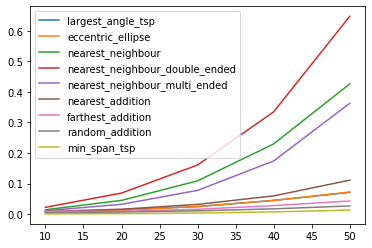

In [19]:
for i, algo in enumerate(algos):
    plot.plot(point_counts, [t[i] for t in times], label=algo.__name__)
plot.legend()
plot.show()

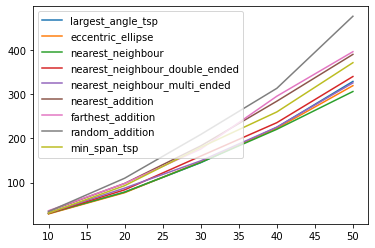

In [20]:
for i, algo in enumerate(algos):
    plot.plot(point_counts, [t[i] for t in costs], label=algo.__name__)
plot.legend()
plot.show()